## Test Functions
Examples for: 
- dprod for large matrices
- Approximating cos(x) and it's derivative using:
    
    - Monomials 
    - Chebyshev polynomial
    - Cubic splines with pre-specified knots
    - Cubic splines 
- Approximate the multidimensional banana function and plot the approximation error

In [1]:
cd D:\\NYU\\2nd year\\Stachurski

D:\NYU\2nd year\Stachurski


In [2]:
from poly_base import interpolate as ip
# Set the directory to the folder where you copied poly_base
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%%timeit
A1 = np.random.randn(100,10)
B1 = np.random.randn(100,1000)
C1 = ip.dprod(A1,B1)

The slowest run took 52.23 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 8.94 ms per loop


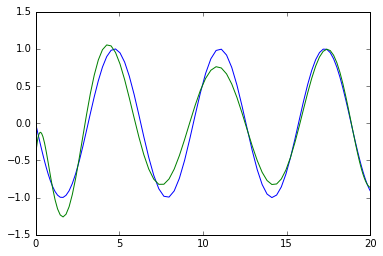

In [4]:
#Approximate cos(x) with Chebychev
n = 12 # number of nodes
x = ip.cheb_nodes((n,0,20),2)  #create the Chebychev (Lobatto) nodes
y = np.cos(x) 
Phi = ip.cheb_basex((n,0,20),x) # create the basis matrix
#Invert to get polynomial coefficients
coeff = np.linalg.solve(Phi, y) #get the coefficients
D = ip.cheb_diff((n,0,20))
x1 = ip.cheb_nodes((100,0,20),0)
y1 = np.cos(x1)
z1 = -np.sin(x1)
Phi1 = ip.cheb_basex((n,0,20),x1)
y_approx = Phi1 @ coeff
z_approx = Phi1 @ D @ coeff    #Approximate the derivative using the difference operator
plt.plot(x1,z1)
plt.plot(x1,z_approx)
plt.show()

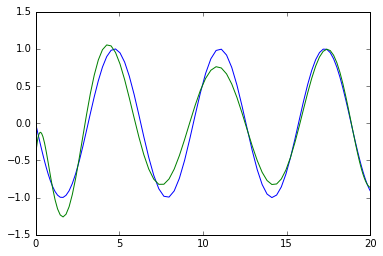

In [5]:
#Approximate cos(x) with monomial
n = 12
x = ip.cheb_nodes((n,0,20),2)
y = np.cos(x)
Phi = ip.mono_basex((n,0,20),x)
#Invert to get polynomial coefficients
coeff = np.linalg.solve(Phi,y)
D = ip.mono_diff((n,0,20))
x1 = ip.cheb_nodes((100,0,20),0)
y1 = np.cos(x1)
z1 = -np.sin(x1)
Phi1 = ip.mono_basex((n,0,20),x1)
y_approx = Phi1 @ coeff
z_approx = Phi1 @ D @ coeff
plt.plot(x1,z1)
plt.plot(x1,z_approx)
plt.show()

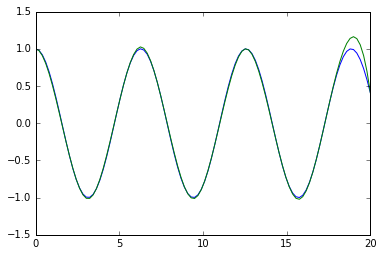

In [6]:
#Approximate cos(x) with higher order splines and pres-pecified knots
n = 9
p = (n,0,20)
x = np.linspace(0,20,n)
knots = np.array([0,np.pi,2*np.pi,3*np.pi,4*np.pi,5*np.pi,20])
k = 3
y = np.cos(x)
Phi=ip.spli_basex(p,x,knots,k)
coeff = np.linalg.solve(Phi,y)
x1 = np.linspace(0,20,100)
y1 = np.cos(x1)
Phi1 = ip.spli_basex(p,x1,knots,k)
y_approx = Phi1 @ coeff
plt.plot(x1,y1)
plt.plot(x1,y_approx)
plt.show()

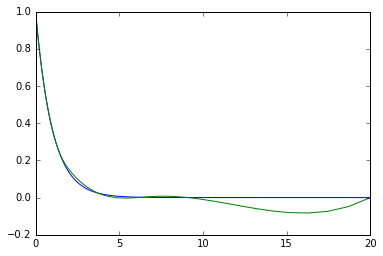

In [7]:
#Approximate exp(-x) with cubic splines and wealth_knot
n = 10
p = (n,0,20)
x = ip.wealth_knot(p,1,curv  = 0.15) 
knots = ip.wealth_knot(p,3,curv  = 0.15)
y = np.exp(-x)
Phi = ip.spli_basex(p,x,knots)
coeff = np.linalg.solve(Phi,y)
x1 = ip.wealth_knot([100,0,20],1,curv  = 0.15)
y1 = np.exp(-x1)
Phi1 = ip.spli_basex(p,x1,knots)
y_approx = Phi1 @ coeff
plt.plot(x1,y1)
plt.plot(x1,y_approx)
plt.show()

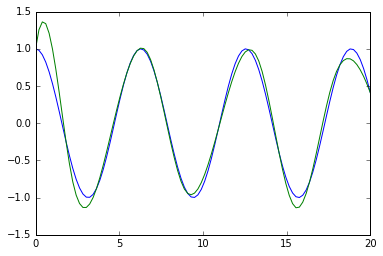

In [8]:
#Approximate cos(x) with cubic splines with automatic equidistant knots
n = 12
p = (n,0,20)
x = np.linspace(0,20,n)
y = np.cos(x)
Phi=ip.spli_basex(p,x)
coeff = np.linalg.solve(Phi,y)
x1 = np.linspace(0,20,100)
y1 = np.cos(x1)
Phi1 = ip.spli_basex(p,x1)
y_approx = Phi1 @ coeff
plt.plot(x1,y1)
plt.plot(x1,y_approx)
plt.show()

In [9]:
# Approximate the banana function
n = 20
P = np.array(((n,-3,3),(n,-3,3)))
Polyname = ('cheb','mono')
Order = (0,0)
x = ip.cheb_nodes(P[0,:],2)
s = np.concatenate([np.transpose(np.kron(x,np.ones((1,n)))),np.transpose(np.kron(np.ones((1,n)),x))],1)
#The banana - vectorized
def Banana(s):
    return (1-s[:,0])**2 + 100 * (s[:,1]-s[:,0]**2)**2
y = Banana(s)
Phi3 = ip.funbas(P,s,Order,Polyname)
coeff = np.linalg.lstsq(Phi3,y)[0]
#Generate the approximand
n1 = 100
x1 = np.linspace(-3,3,n1)
s1 = np.concatenate([np.transpose(np.kron(x1,np.ones((1,n1)))),np.transpose(np.kron(np.ones((1,n1)),x1))],1)
y1 = Banana(s1)
Phi3a = ip.funbas(P,s1,Order,Polyname)
y_approx= Phi3a @ coeff

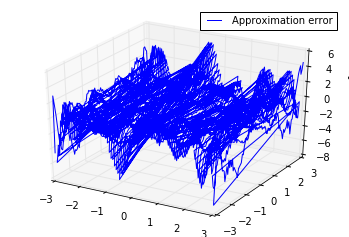

In [10]:
#3D Plot for the banana approximation
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(s1[:,0], s1[:,1], y1-y_approx, label='Approximation error')
ax.legend()

plt.show()